# Explore here

In [ ]:
#When we want to predict a numerical value: regression
#When we want to predict a label: classification (0, 1)
# HERE use CLASSIFICATION

In [38]:
# import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

total_data = pd.read_csv("../data/raw/diabetes.csv") # data/raw/diabetes.csv = relative path, it is easier for other people to find the file when working on the project

total_data.head() # shows top 5 rows of dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
total_data.info() # shows if there are missing values and how many numerical and categorical values are there
# 9 columns, 768 rows
# there are no missing values (but some of them that are 0 do not make any sense such as skin thickness)
# all data is numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
# Filter out skin thickness
filtered_skin_data = total_data[total_data["SkinThickness"] > 0 ] 

In [41]:
filtered_skin_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1


In [42]:
filtered_skin_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               541 non-null    int64  
 1   Glucose                   541 non-null    int64  
 2   BloodPressure             541 non-null    int64  
 3   SkinThickness             541 non-null    int64  
 4   Insulin                   541 non-null    int64  
 5   BMI                       541 non-null    float64
 6   DiabetesPedigreeFunction  541 non-null    float64
 7   Age                       541 non-null    int64  
 8   Outcome                   541 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.3 KB


Too many records where filtered out when applying skin thickness > 0 filter: we will continue with total_data

In [43]:
total_data.Outcome.nunique() # count number of unique values
# values here are very spread out, the nunique is not very useful in this 

2

In [44]:
total_data['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

<Axes: >

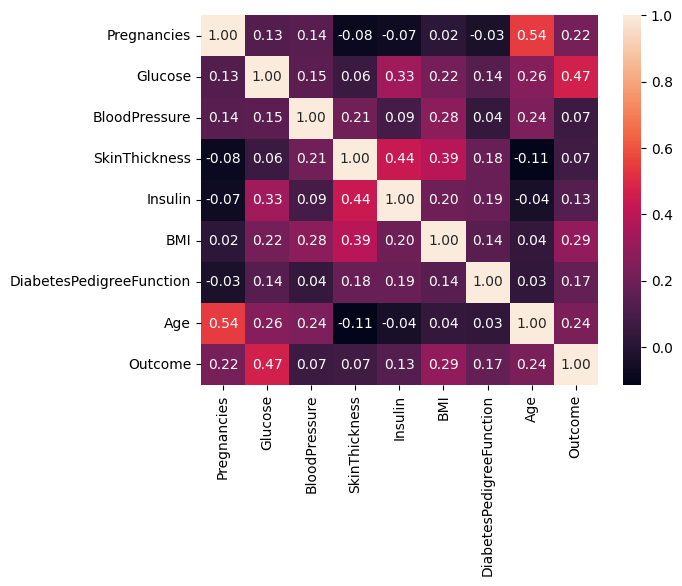

In [45]:
# we can build a heat map since we have all numerical data
import seaborn as sns

sns.heatmap(total_data.corr(), annot=True, fmt=".2f")


In [46]:
# print(total_data.duplicated('Insulin').sum()) # a lot of duplicated data in insulin column: normal in these types of dataframes
print(total_data.duplicated().sum()) # no duplicated rows: check before eliminating duplicated values!! Especially when there is no unique ID for every "participant"

0


In [47]:
from sklearn.model_selection import train_test_split # pip install scikit-learn
X = total_data.drop("Outcome", axis = 1) # outcome : what we are trying to predict (1 = diabetes, 0 = no diabetes) (axis 0, default, is a row, but we want to eliminate a column)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # split the data

In [48]:
print("X_train:", X_train.shape) # 80%
print("X_test:", X_test.shape) # 20%

X_train: (614, 8)
X_test: (154, 8)


In [49]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 3, random_state = 42) #max_depth to prevent overfitting of the model
model.fit(X_train, y_train) # model is trained, after the fit we can use the model to make predictions

DecisionTreeClassifier(max_depth=3, random_state=42)

[Text(0.5, 0.875, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'Age <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.375, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'BMI <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'BMI <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.375, 'Glucose <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11.0, 14.0]'),
 Text(0.875, 0.375, 'Glucose <= 165.5\ngini = 0.4\nsamples = 163\

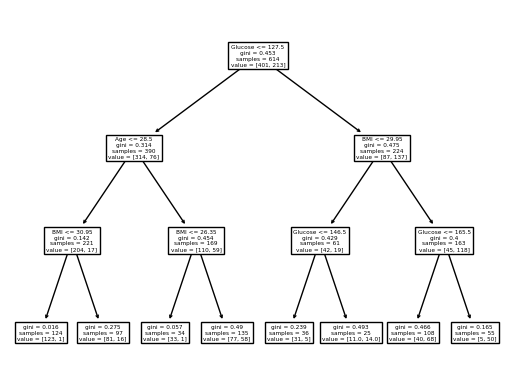

In [50]:
import matplotlib as plt
from sklearn import tree

tree.plot_tree(model, feature_names= list(X_train.columns))  # feature names need to be a list (with the four features)

In [51]:
y_prediction = model.predict(X_test) #prediction on test data based on what model learnt

In [52]:
y_prediction # 0 and 1 based on if they are going to have diabetes or not

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [53]:
# accuracy test
from sklearn.metrics import accuracy_score

accuracy_score(y_prediction, y_test) # compare the two to see how accurate

0.7597402597402597

In [54]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 5, 15, 20, 25],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 5]
}

# look for all possible combinations of parameters and find the best model for the prediction

In [55]:
model = DecisionTreeClassifier() # initialise the model
grid = GridSearchCV(model, hyperparameters, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [65]:
# print the best parameters
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [66]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [67]:
y_predict = grid.predict(X_test) # looking for the best model response/predictions, grid knows which parameters values are the best

In [68]:
from sklearn.metrics import accuracy_score

accuracy_score(y_predict, y_test)

0.7727272727272727

In [69]:
#save the model
from pickle import dump

dump(model, open("", "wb")) # where should I save this?